# Rede Neural de Dados sobre Diabetes

In [1]:
from sklearn.datasets import load_diabetes
import tensorflow as tf
#Load dos dados do dataset diabetes e ver a descrição do dataset
diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [2]:
#verificar as chaves existentes no dataset
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
#Salvar as entras e os rotulos em variaveis
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [5]:
#Normalizar os dados
targets = (targets - targets.mean(axis=0)) / targets.std()

In [6]:
#Dividis os dados em treino e testes
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### FeedFoward Rede Neural

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Criando a rede Neural

def get_model():
  model = Sequential([
          Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
          Dense(128, activation="relu"),
          Dense(128, activation="relu"),
          Dense(128, activation="relu"),
          Dense(128, activation="relu"),
          Dense(128, activation="relu"),
          Dense(1, activation="sigmoid")
  ])

  return model

In [10]:
#Criando uma variavel para a rede neural
model = get_model()

In [11]:
#Ver o sumario da rede neural

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [12]:
#Copilar o modelo

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
mse = tf.keras.metrics.mean_squared_error

model.compile(
      optimizer=opt,
      loss="mse",
      metrics=mse
)

In [13]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15,batch_size=64, verbose=2)

Epoch 1/100
6/6 - 1s - loss: 1.1573 - mean_squared_error: 1.1573 - val_loss: 1.2184 - val_mean_squared_error: 1.2184 - 1s/epoch - 232ms/step
Epoch 2/100
6/6 - 0s - loss: 0.9639 - mean_squared_error: 0.9639 - val_loss: 0.9739 - val_mean_squared_error: 0.9739 - 41ms/epoch - 7ms/step
Epoch 3/100
6/6 - 0s - loss: 0.8723 - mean_squared_error: 0.8723 - val_loss: 0.9667 - val_mean_squared_error: 0.9667 - 40ms/epoch - 7ms/step
Epoch 4/100
6/6 - 0s - loss: 0.8616 - mean_squared_error: 0.8616 - val_loss: 0.9905 - val_mean_squared_error: 0.9905 - 40ms/epoch - 7ms/step
Epoch 5/100
6/6 - 0s - loss: 0.7950 - mean_squared_error: 0.7950 - val_loss: 0.7908 - val_mean_squared_error: 0.7908 - 40ms/epoch - 7ms/step
Epoch 6/100
6/6 - 0s - loss: 0.7371 - mean_squared_error: 0.7371 - val_loss: 0.8873 - val_mean_squared_error: 0.8873 - 39ms/epoch - 7ms/step
Epoch 7/100
6/6 - 0s - loss: 0.7713 - mean_squared_error: 0.7713 - val_loss: 0.9244 - val_mean_squared_error: 0.9244 - 40ms/epoch - 7ms/step
Epoch 8/100
6

In [14]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.4233 - mean_squared_error: 0.4233 - 26ms/epoch - 13ms/step


[0.423311710357666, 0.423311710357666]

### Plotando o gráfico de aprendizado

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

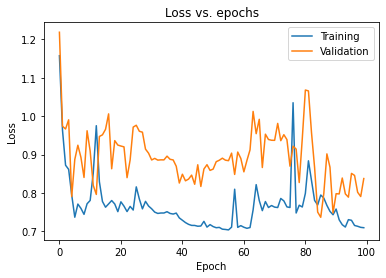

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### Agora vamos analisar utilizando regularização no modelo

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [19]:
def get_regularised_model(wd, rate):
  model = Sequential([
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(1, activation='sigmoid')
  ])
  return model

In [20]:
model = get_regularised_model(1e-5, 0.3)

In [21]:
opt = tf.keras.optimizers.Adam()

model.compile(
              optimizer=opt,
              loss = 'mse',
              metrics = [mse]
              )

In [22]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 2s - loss: 1.2972 - mean_squared_error: 1.2906 - val_loss: 1.2403 - val_mean_squared_error: 1.2338 - 2s/epoch - 261ms/step
Epoch 2/100
6/6 - 0s - loss: 1.2503 - mean_squared_error: 1.2438 - val_loss: 1.1991 - val_mean_squared_error: 1.1926 - 50ms/epoch - 8ms/step
Epoch 3/100
6/6 - 0s - loss: 1.1250 - mean_squared_error: 1.1185 - val_loss: 1.1360 - val_mean_squared_error: 1.1295 - 56ms/epoch - 9ms/step
Epoch 4/100
6/6 - 0s - loss: 0.9964 - mean_squared_error: 0.9899 - val_loss: 1.2006 - val_mean_squared_error: 1.1941 - 60ms/epoch - 10ms/step
Epoch 5/100
6/6 - 0s - loss: 0.9805 - mean_squared_error: 0.9740 - val_loss: 1.2264 - val_mean_squared_error: 1.2199 - 53ms/epoch - 9ms/step
Epoch 6/100
6/6 - 0s - loss: 0.9789 - mean_squared_error: 0.9724 - val_loss: 1.2085 - val_mean_squared_error: 1.2020 - 50ms/epoch - 8ms/step
Epoch 7/100
6/6 - 0s - loss: 0.9581 - mean_squared_error: 0.9517 - val_loss: 1.1088 - val_mean_squared_error: 1.1024 - 50ms/epoch - 8ms/step
Epoch 8/100


In [23]:
model.evaluate(test_data, test_targets, verbose=2)


2/2 - 0s - loss: 0.4244 - mean_squared_error: 0.4189 - 25ms/epoch - 13ms/step


[0.42444801330566406, 0.41886791586875916]

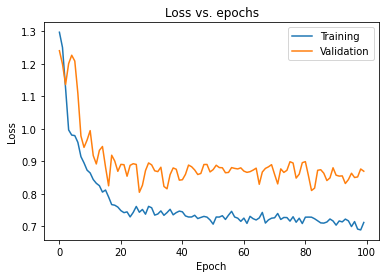

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### Normalização por lote

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [26]:
#Criando o modelo
def get_batch_model():
    model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    Dense(256, activation='relu'),
 
])
    
    return model

In [27]:
model = get_batch_model()

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [29]:
#Definindo as configurações do lote
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95,
    epsilon=0.005,
    axis=-1,
    beta_initializer=tf.initializers.RandomNormal(mean=0.0, stddev=0.05),
    gamma_initializer=tf.keras.initializers.Constant(value=0.5)
))

In [30]:
model.add(Dense(1, activation='sigmoid'))

In [31]:
opt = tf.keras.optimizers.Adam()

model.compile(
    optimizer=opt,
    loss='mse',
    metrics=['mse']
)

In [32]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64,verbose=2)

Epoch 1/100
6/6 - 2s - loss: 1.2304 - mse: 1.2304 - val_loss: 1.2215 - val_mse: 1.2215 - 2s/epoch - 274ms/step
Epoch 2/100
6/6 - 0s - loss: 1.0817 - mse: 1.0817 - val_loss: 1.1994 - val_mse: 1.1994 - 43ms/epoch - 7ms/step
Epoch 3/100
6/6 - 0s - loss: 0.9767 - mse: 0.9767 - val_loss: 1.1809 - val_mse: 1.1809 - 44ms/epoch - 7ms/step
Epoch 4/100
6/6 - 0s - loss: 0.9265 - mse: 0.9265 - val_loss: 1.1690 - val_mse: 1.1690 - 45ms/epoch - 8ms/step
Epoch 5/100
6/6 - 0s - loss: 0.8842 - mse: 0.8842 - val_loss: 1.1622 - val_mse: 1.1622 - 43ms/epoch - 7ms/step
Epoch 6/100
6/6 - 0s - loss: 0.8309 - mse: 0.8309 - val_loss: 1.1589 - val_mse: 1.1589 - 42ms/epoch - 7ms/step
Epoch 7/100
6/6 - 0s - loss: 0.8599 - mse: 0.8599 - val_loss: 1.1587 - val_mse: 1.1587 - 41ms/epoch - 7ms/step
Epoch 8/100
6/6 - 0s - loss: 0.8377 - mse: 0.8377 - val_loss: 1.1588 - val_mse: 1.1588 - 41ms/epoch - 7ms/step
Epoch 9/100
6/6 - 0s - loss: 0.8554 - mse: 0.8554 - val_loss: 1.1604 - val_mse: 1.1604 - 41ms/epoch - 7ms/step
E

In [33]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.4508 - mse: 0.4508 - 24ms/epoch - 12ms/step


[0.45079123973846436, 0.45079123973846436]

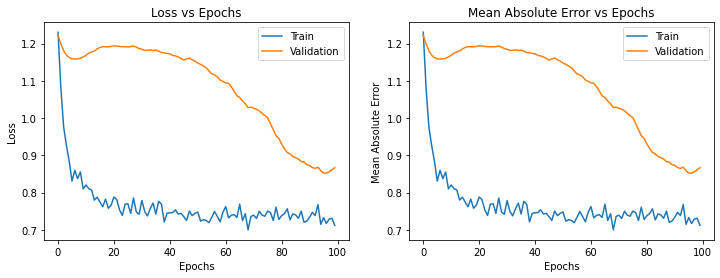

In [34]:
# Criando grafico de Perda e Precisão

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Perda
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Precisão
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mse'], label="Train")
ax.plot(epochs, frame['val_mse'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

### Aprendendo a utilizar Callbacks simples

In [35]:
from tensorflow.keras.callbacks import Callback

In [37]:
#Exemplo de callback de treinamento

class TrainingCallback(Callback):

  def on_train_begin(self, log=None):
    print("Começando o Treinamento...")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Começando as epoch {epoch} ")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Treinamento: Comçando batch {batch}")

  def on_train_batch_end(self, batch, logs=None):
    print(f"Treinamento: Terminando batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Terminando epoch {epoch}")

  def on_train_end(self, logs=None):
    print("Terminando treinamento!")

In [38]:
#Exemplos de Callbacks de teste

class TestCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Começando o teste...")

    def on_test_batch_begin(self, batch, logs=None):
        print(f"Teste: Começando batch {batch}")

    def on_test_batch_end(self, batch, logs=None):
        print(f"Teste: Terminando batch {batch}")  

    def on_test_end(self, logs=None):
        print("Terminando treinamento!")     

In [39]:
#Exemplo de Callback de Previsão

class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Começando previão...")

    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Previsão: Comaçando batch {batch}")

    def on_predict_batch_end(self, batch, logs=None):
        print(f"Previsão: Terminando batch {batch}")
    
    def on_predict_end(self, logs=None):
        print("Terminando a previsão!")
         

In [40]:
model = get_regularised_model(1e-5, 0.3)

In [41]:
model.compile(optimizer="adam", loss="mse")

In [42]:
model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Começando o Treinamento...
Começando as epoch 0 
Treinamento: Comçando batch 0
Treinamento: Terminando batch 0
Treinamento: Comçando batch 1
Treinamento: Terminando batch 1
Treinamento: Comçando batch 2
Treinamento: Terminando batch 2
Treinamento: Comçando batch 3
Treinamento: Terminando batch 3
Terminando epoch 0
Começando as epoch 1 
Treinamento: Comçando batch 0
Treinamento: Terminando batch 0
Treinamento: Comçando batch 1
Treinamento: Terminando batch 1
Treinamento: Comçando batch 2
Treinamento: Terminando batch 2
Treinamento: Comçando batch 3
Treinamento: Terminando batch 3
Terminando epoch 1
Começando as epoch 2 
Treinamento: Comçando batch 0
Treinamento: Terminando batch 0
Treinamento: Comçando batch 1
Treinamento: Terminando batch 1
Treinamento: Comçando batch 2
Treinamento: Terminando batch 2
Treinamento: Comçando batch 3
Treinamento: Terminando batch 3
Terminando epoch 2
Terminando treinamento!


In [43]:
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestCallback()])

Começando o teste...
Teste: Começando batch 0
Teste: Terminando batch 0
Teste: Começando batch 1
Teste: Terminando batch 1
Terminando treinamento!


0.8059305548667908

In [44]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Começando previão...
Previsão: Comaçando batch 0
Previsão: Terminando batch 0
Previsão: Comaçando batch 1
Previsão: Terminando batch 1
Terminando a previsão!


array([[0.38112897],
       [0.36487216],
       [0.38215655],
       [0.3629067 ],
       [0.37973082],
       [0.38419825],
       [0.37876508],
       [0.3775453 ],
       [0.38076952],
       [0.3557431 ],
       [0.35901543],
       [0.38888898],
       [0.36342555],
       [0.3913422 ],
       [0.36697027],
       [0.34965703],
       [0.38431165],
       [0.36746216],
       [0.38367546],
       [0.36732787],
       [0.37924987],
       [0.37368184],
       [0.36004645],
       [0.37467974],
       [0.37068993],
       [0.3719381 ],
       [0.35358965],
       [0.3742203 ],
       [0.38610402],
       [0.38802254],
       [0.3639376 ],
       [0.3815884 ],
       [0.3796404 ],
       [0.36950245],
       [0.37927288],
       [0.3668363 ],
       [0.37343824],
       [0.35410103],
       [0.3851383 ],
       [0.37485498],
       [0.3791463 ],
       [0.37877178],
       [0.3662842 ],
       [0.35620072],
       [0.36729628]], dtype=float32)

# Manipulando as logs dos Callbacks

Podemos utilizar os logs para passar informações de metricas.

In [45]:
#Criar um modelo
model = tf.keras.Sequential([
  Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
  Dense(64, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  Dense(64, activation="relu"),
  Dense(64, activation="relu"),
  Dense(1)

])

In [46]:
#compila o modelo

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Customizar Callback

Vamos customizar as Callback para os logs de dicionarios tenham acesso de perda e metrica de valores

In [48]:
class LossAndMetricCallback(tf.keras.callbacks.Callback):

  #Imprimir a perda a cada segundo do lote de treinamento
  def on_train_batch_begin(self, batch, logs=None):
    if logs is not None and 'loss' in logs:
      if batch %2 == 0:
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

   # Imprimir a perda após cada lote no conjunto de teste
  def on_test_batch_end(self, batch, logs=None):
    if logs is not None and 'loss' in logs:
      print('\n After batch {}, the loss is {:.2f}.'.format(batch, logs['loss']))

   # Imprimir a perda e o erro médio absoluto após cada época
  def on_epoch_end(self, epoch, logs=None):
    if logs is not None and 'loss' in logs:
      print('Epoch {}: Average loss is {:.2f}, mean absolute error is {:.2f}.'.format(epoch, logs['loss'], logs['mae']))

# Notificar o utilizador quando a previsão tiver terminado em cada lote
  def on_predict_batch_end(self, batch, logs=None):
    print("Finished prediction on batch {}!".format(batch))

In [49]:
#treinar o modelo
history = model.fit(train_data, train_targets, epochs=20,
                    batch_size=100, callbacks=[LossAndMetricCallback()], verbose=False)

Epoch 0: Average loss is 0.94, mean absolute error is 0.82.
Epoch 1: Average loss is 0.64, mean absolute error is 0.66.
Epoch 2: Average loss is 0.55, mean absolute error is 0.60.
Epoch 3: Average loss is 0.50, mean absolute error is 0.57.
Epoch 4: Average loss is 0.46, mean absolute error is 0.55.
Epoch 5: Average loss is 0.45, mean absolute error is 0.53.
Epoch 6: Average loss is 0.43, mean absolute error is 0.52.
Epoch 7: Average loss is 0.41, mean absolute error is 0.51.
Epoch 8: Average loss is 0.43, mean absolute error is 0.52.
Epoch 9: Average loss is 0.40, mean absolute error is 0.50.
Epoch 10: Average loss is 0.38, mean absolute error is 0.49.
Epoch 11: Average loss is 0.37, mean absolute error is 0.48.
Epoch 12: Average loss is 0.40, mean absolute error is 0.50.
Epoch 13: Average loss is 0.36, mean absolute error is 0.47.
Epoch 14: Average loss is 0.34, mean absolute error is 0.46.
Epoch 15: Average loss is 0.33, mean absolute error is 0.46.
Epoch 16: Average loss is 0.32, me

In [50]:
model_eval = model.evaluate(test_data, test_targets, batch_size=10, callbacks=[LossAndMetricCallback()], verbose=False)


 After batch 0, the loss is 0.78.

 After batch 1, the loss is 0.83.

 After batch 2, the loss is 0.69.

 After batch 3, the loss is 0.68.

 After batch 4, the loss is 0.66.


### CallBacks personalizadas

Vamos definir uma callback para alterar a taxa de aprendizado do otimizador de um modelo durante o treinamento. Faremos isso especificando as épocas e as novas taxas de aprendizagem em que gostaríamos que fossem alteradas.

In [59]:
lr_schedule =[
  (4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)
]

def get_new_epoch_lr(epoch, lr):
  #Verifica se a época de entrada está listada na tabela de taxas de #aprendizagem e, se estiver, devolve o índice em lr_schedule
  epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0]==int(epoch)]
  if len(epoch_in_sched)>0:
  # Se for, devolve a taxa de aprendizagem correspondente à época  
    return lr_schedule[epoch_in_sched[0]][1]
  else:
    # Caso contrário, devolver a taxa de aprendizagem existente
    return lr

In [64]:
class LRScheduler(tf.keras.callbacks.Callback):

  def __init__(self, new_lr):
    super(LRScheduler, self).__init__()
    # Adicionar a nova função de taxa de aprendizagem ao nosso retorno de chamada
    self.new_lr = new_lr

  def on_epoch_begin(self, epoch, logs=None):
    # Certifique-se de que o optimizador que escolhemos tem uma taxa de aprendizagem e, se não tiver, assinala um erro
    if not hasattr(self.model.optimizer, 'lr'):
      raise ValueError('Erro: Optimizer does not have a learning rate.')
    
     # Obter a taxa de aprendizagem atual
    curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))

     # Chamar a função auxiliar para obter a taxa de aprendizagem programada para a época atual
    scheduled_rate = self.new_lr(epoch, curr_rate)

  # Definir a taxa de aprendizagem para a taxa de aprendizagem programada
    tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_rate)
    print('Learning rate for epoch {} is {:.3f}'.format(epoch, scheduled_rate))



In [65]:
new_model = tf.keras.Sequential([
  Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
  Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(1)
])

In [66]:
new_model.compile(loss="mse",
                  optimizer="adam",
                  metrics=['mae', 'mse'])

In [67]:
new_history = new_model.fit(train_data, train_targets, epochs=20,
                            batch_size=100, callbacks=[LRScheduler(get_new_epoch_lr)], verbose=False)

Learning rate for epoch 0 is 0.001
Learning rate for epoch 1 is 0.001
Learning rate for epoch 2 is 0.001
Learning rate for epoch 3 is 0.001
Learning rate for epoch 4 is 0.030
Learning rate for epoch 5 is 0.030
Learning rate for epoch 6 is 0.030
Learning rate for epoch 7 is 0.020
Learning rate for epoch 8 is 0.020
Learning rate for epoch 9 is 0.020
Learning rate for epoch 10 is 0.020
Learning rate for epoch 11 is 0.005
Learning rate for epoch 12 is 0.005
Learning rate for epoch 13 is 0.005
Learning rate for epoch 14 is 0.005
Learning rate for epoch 15 is 0.007
Learning rate for epoch 16 is 0.007
Learning rate for epoch 17 is 0.007
Learning rate for epoch 18 is 0.007
Learning rate for epoch 19 is 0.007
